In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
csv_path = "dataset.csv"

# Load the dataset (low_memory=False prevents dtype guessing warnings)
print("Loading the dataset... this may take a minute.")
df = pd.read_csv(csv_path, low_memory=False)

print(f"Dataset loaded successfully! Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head(20)


Loading the dataset... this may take a minute.
Dataset loaded successfully! Shape: 2,060 rows × 10 columns


,timestamp,src_ip,user_agent,http_method,endpoint,status_code,response_bytes,request_duration_ms,geo_location,label
0,2023-11-15 00:01:07.000,129.153.198.180,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_10_...,POST,/login,200,2414,242,LY,Normal
1,2023-11-15 00:02:09.000,130.199.228.88,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.1...,POST,/login,200,1856,704,SV,Normal
2,2023-11-15 00:05:55.000,120.146.59.122,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.7.20) G...,POST,/login,403,2452,617,SE,Normal
3,2023-11-15 00:06:18.000,17.129.250.50,Mozilla/5.0 (Windows NT 5.2) AppleWebKit/531.0...,POST,/login,200,4372,658,SD,Normal
4,2023-11-15 00:10:02.000,217.140.220.21,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_12_8; ...,POST,/login,200,4815,106,OM,Normal
5,2023-11-15 00:11:33.000,222.114.147.17,Mozilla/5.0 (Windows 95) AppleWebKit/531.0 (KH...,POST,/login,200,2136,320,RS,Normal
6,2023-11-15 00:14:35.000,207.200.7.191,Mozilla/5.0 (Android 2.1; Mobile; rv:6.0) Geck...,POST,/login,200,2970,452,RU,Normal
7,2023-11-15 00:17:00.000,28.213.82.112,Mozilla/5.0 (iPhone; CPU iPhone OS 14_2 like M...,POST,/login,200,3696,227,QA,Normal
8,2023-11-15 00:20:23.000,10.132.216.46,Mozilla/5.0 (iPad; CPU iPad OS 5_1_1 like Mac ...,POST,/login,200,4074,733,GH,Normal
9,2023-11-15 00:23:38.000,10.30.138.198,Mozilla/5.0 (Windows NT 5.2) AppleWebKit/533.0...,POST,/login,200,1687,777,VC,Normal


Basic Dataset Statistics:
Number of Rows:  2060 
Number of Columns:  10

List of features:
timestamp, src_ip, user_agent, http_method, endpoint, status_code, response_bytes, request_duration_ms, geo_location, label

 Distribution of attack classes


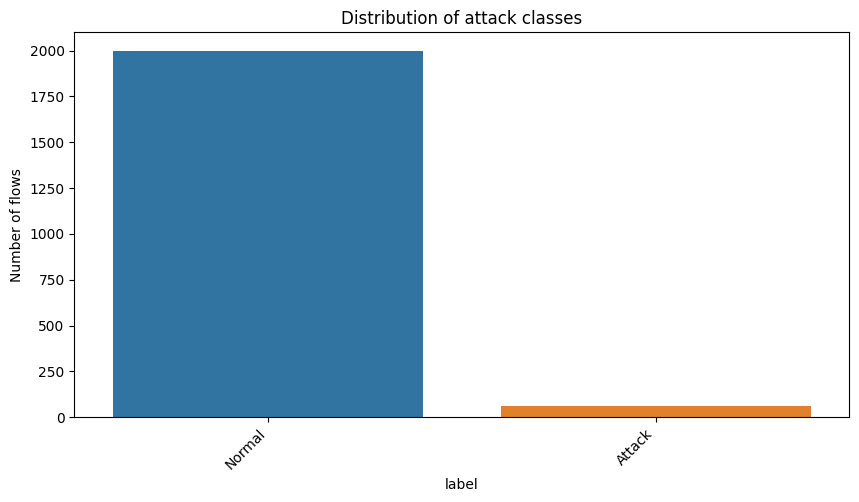


 Time-based distribution of attacks


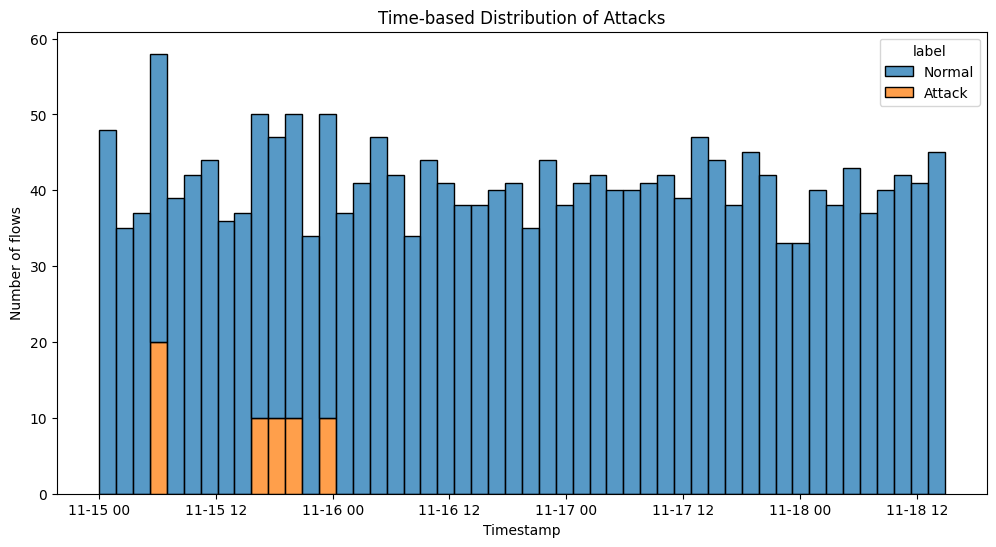

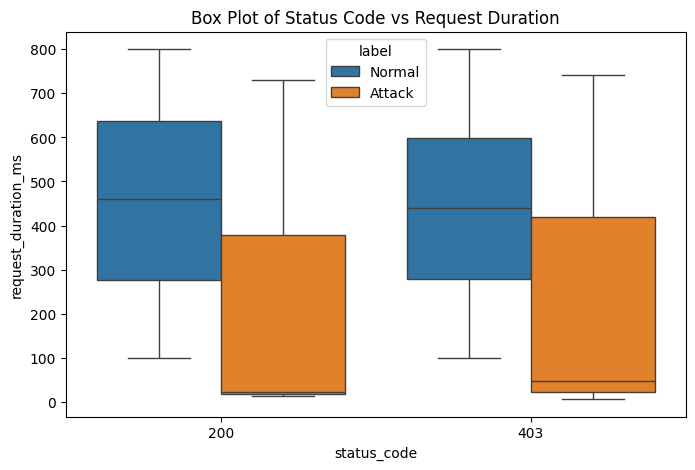


 Scatter plots of selected features


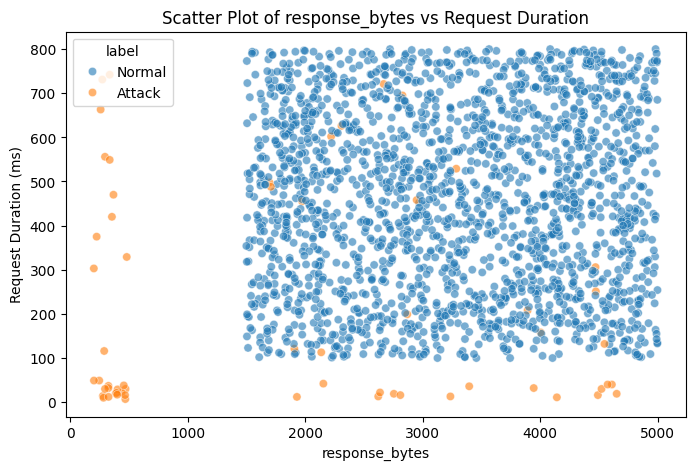

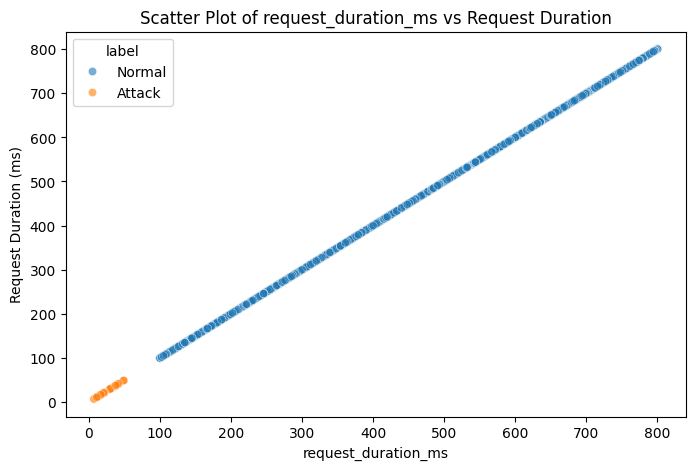

In [ ]:
##########################################################
# exploratory data analysis (EDA)
##########################################################

# 1. Basic dataset statistics
# Number of rows, columns, feature names
print("Basic Dataset Statistics:")
print("Number of Rows: ", df.shape[0], "\nNumber of Columns: ", df.shape[1])
print("\nList of features:")
print(", ".join(df.columns))

# Distribution of attack class`es
print("\n Distribution of attack classes")
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="label", hue="label", order=df["label"].value_counts().index, palette="tab10")
plt.title("Distribution of attack classes")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of flows")
plt.xlabel("label")
plt.show()

# 2. Visualizations
# time-based distribution of attacks
print("\n Time-based distribution of attacks")
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='timestamp', hue='label', multiple='stack', bins=50, palette="tab10")
plt.title("Time-based Distribution of Attacks")
plt.xlabel("Timestamp")
plt.ylabel("Number of flows")
plt.show()

# box plots of status_code vs request_duration_ms
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='status_code', y='request_duration_ms', hue='label', palette="tab10")
plt.title("Box Plot of Status Code vs Request Duration")
plt.show()

# scatter plots of all  features
print("\n Scatter plots of selected features")
selected_features = ['timestamp', 'response_bytes', 'request_duration_ms']
for feature in selected_features:
    if feature != 'timestamp':
        plt.figure(figsize=(8,5))
        sns.scatterplot(data=df, x=feature, y='request_duration_ms', hue='label', palette="tab10", alpha=0.6)
        plt.title(f"Scatter Plot of {feature} vs Request Duration")
        plt.xlabel(feature)
        plt.ylabel("Request Duration (ms)")
        plt.show()



Normal traffic consists of a consistent, steady flow over time, characterized by request durations broadly distributed between 100ms and 800ms and response sizes consistently exceeding 1,500 bytes. In contrast, anomalies manifest as short, high-density bursts of activity rather than a continuous stream. We expect to detect attacks by identifying a specific "fast and small" signature: requests that complete unusually quickly (mostly under 50ms) and return minimal data (under 500 bytes), distinguishing them from the slower, data-rich behavior of legitimate users. Not all annomalies show this behavior and some of them are outliers compared to the typical attacks.



In [ ]:
##########################################################
# Applying annomaly detection using Isolation Forest
##########################################################

# ==========================================
# 1. Preprocessing
# ==========================================

X_data = df.copy()

# Encode categorical features
high_cardinality_cols = ['src_ip', 'user_agent']
for col in high_cardinality_cols:
    # Map the column values to their frequency (count) in the dataset
    X_data[f'{col}_freq'] = X_data[col].map(X_data[col].value_counts())
    print(f"Encoded {col} with frequency encoding.")

categorical_cols = ['geo_location', 'http_method']
X_encoded = pd.get_dummies(X_data[categorical_cols], drop_first=False)

# Combine numeric and encoded features
numeric_cols = ['response_bytes', 'request_duration_ms', 'status_code', 'src_ip_freq', 'user_agent_freq']
X_final = pd.concat([X_data[numeric_cols], X_encoded], axis=1)

# Scale Numeric Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

print("Data shape after preprocessing:", X_scaled.shape)
print("Features used:", list(X_final.columns))



Encoded src_ip with frequency encoding.
Encoded user_agent with frequency encoding.
Data shape after preprocessing: (2060, 200)
Features used: ['response_bytes', 'request_duration_ms', 'status_code', 'src_ip_freq', 'user_agent_freq', 'geo_location_AD', 'geo_location_AE', 'geo_location_AF', 'geo_location_AG', 'geo_location_AL', 'geo_location_AM', 'geo_location_AO', 'geo_location_AR', 'geo_location_AT', 'geo_location_AU', 'geo_location_AZ', 'geo_location_BA', 'geo_location_BB', 'geo_location_BD', 'geo_location_BE', 'geo_location_BF', 'geo_location_BG', 'geo_location_BH', 'geo_location_BI', 'geo_location_BJ', 'geo_location_BN', 'geo_location_BO', 'geo_location_BR', 'geo_location_BS', 'geo_location_BT', 'geo_location_BW', 'geo_location_BY', 'geo_location_BZ', 'geo_location_CA', 'geo_location_CD', 'geo_location_CF', 'geo_location_CG', 'geo_location_CH', 'geo_location_CI', 'geo_location_CL', 'geo_location_CM', 'geo_location_CN', 'geo_location_CO', 'geo_location_CR', 'geo_location_CU', 'geo_l

In [40]:
print("\n--- 2. Training Isolation Forest ---")

iso_forest = IsolationForest(
    n_estimators=200,          # Number of trees in the forest
    contamination=0.04,        # The proportion of outliers in the data set
    random_state=42,           # For reproducibility
    n_jobs=-1                  # Run in parallel
)

# Train the model
iso_forest.fit(X_scaled)

# Extract predictions and scores
# predict(): Returns -1 for outliers (anomalies) and 1 for inliers (normal)
# decision_function(): Returns anomaly score. Lower scores = more anomalous.
df['pred_iso'] = iso_forest.predict(X_scaled)
df['anomaly_score'] = iso_forest.decision_function(X_scaled)

# Convert prediction format to match our dataset labels for easier comparison
# -1 -> 'Attack', 1 -> 'Normal'
df['pred_label'] = df['pred_iso'].map({1: 'Normal', -1: 'Attack'})

print("Training complete.")




--- 2. Training Isolation Forest ---
Training complete.



--- 3. Evaluation ---
Total rows: 2060
Normal detected: 1977
Anomalies detected: 83


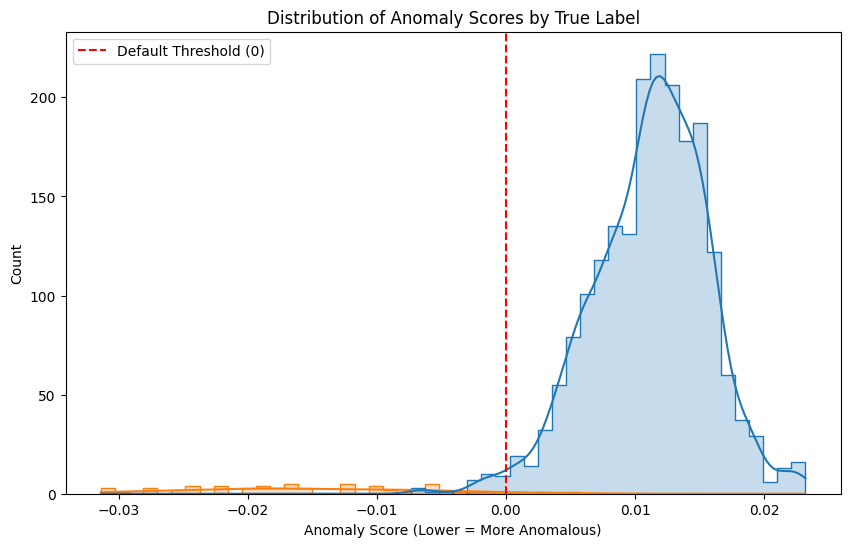

In [41]:
# ==========================================
# 3. Evaluation
# ==========================================
print("\n--- 3. Evaluation ---")

# A. Report detection counts
n_anomalies = (df['pred_iso'] == -1).sum()
n_normal = (df['pred_iso'] == 1).sum()
print(f"Total rows: {len(df)}")
print(f"Normal detected: {n_normal}")
print(f"Anomalies detected: {n_anomalies}")

# B. Histogram of Anomaly Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='anomaly_score', hue='label', bins=50, kde=True, element="step")
plt.title('Distribution of Anomaly Scores by True Label')
plt.xlabel('Anomaly Score (Lower = More Anomalous)')
plt.ylabel('Count')
plt.axvline(x=0, color='r', linestyle='--', label='Default Threshold (0)')
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

      Attack       0.69      0.95      0.80        60
      Normal       1.00      0.99      0.99      2000

    accuracy                           0.99      2060
   macro avg       0.84      0.97      0.89      2060
weighted avg       0.99      0.99      0.99      2060

Confusion Matrix:
[[1974   26]
 [   3   57]]


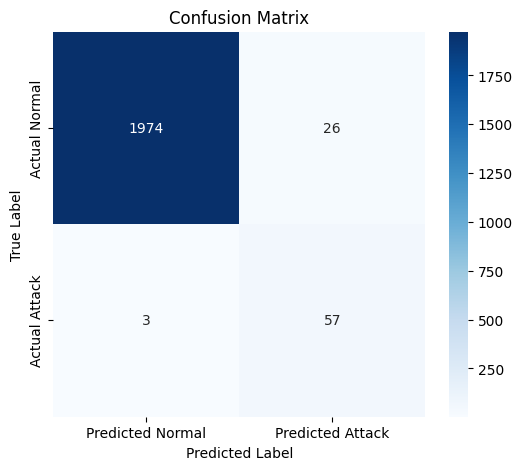

In [38]:
# C. Metrics (Accuracy, Precision, Recall)
# We compare 'label' (Ground Truth) vs 'pred_label' (Model Prediction)
print("\nClassification Report:")
print(classification_report(df['label'], df['pred_label'], target_names=['Attack', 'Normal']))

print("Confusion Matrix:")
cm = confusion_matrix(df['label'], df['pred_label'], labels=['Normal', 'Attack'])
print(cm)

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Normal', 'Predicted Attack'],
            yticklabels=['Actual Normal', 'Actual Attack'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


--- 5. Visualizing Anomaly Decision Boundaries (2D) ---


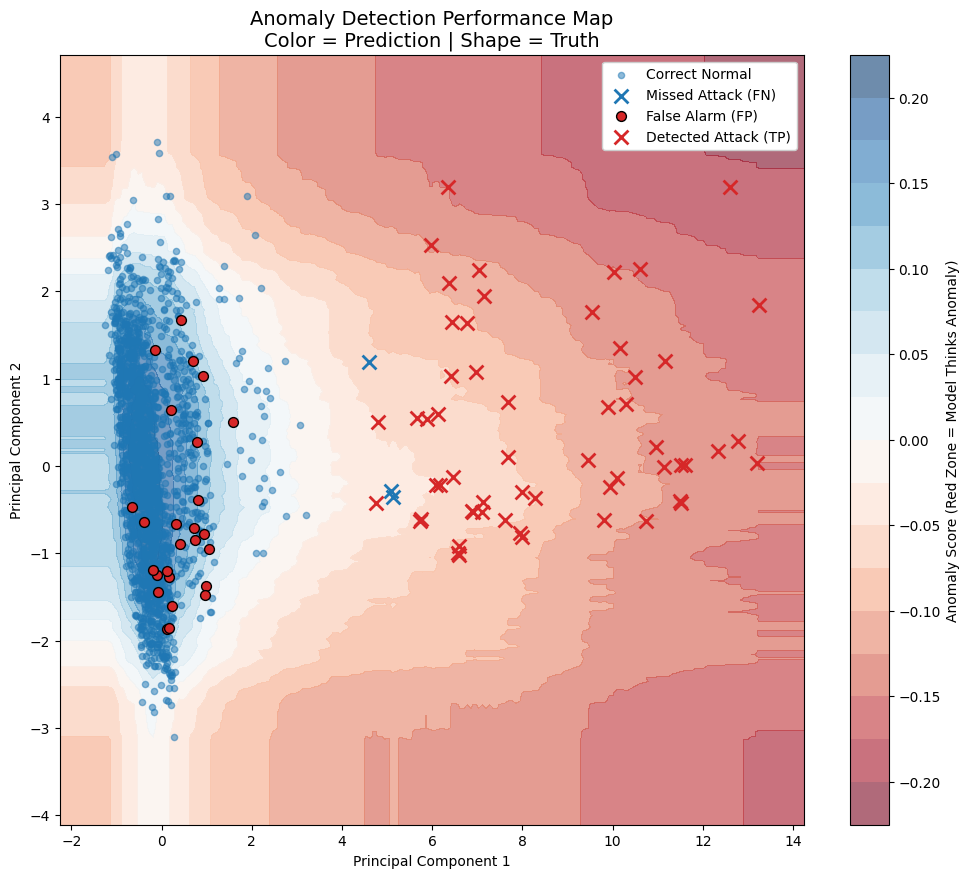

Correct Normals (Blue Circles): 1974
Missed Attacks (Blue Crosses): 3 <-- CRITICAL
False Alarms (Red Circles): 26
Detected Attacks (Red Crosses): 57


In [48]:
##########################################################
# 5. Anomaly Map (Contour Plot) - Color/Shape Logic
##########################################################
import matplotlib.lines as mlines # Helper for custom legend

print("\n--- 5. Visualizing Anomaly Decision Boundaries (2D) ---")

# 1. Setup PCA and Grid (Standard setup)
pca = PCA(n_components=2, random_state=42)
X_plot = pca.fit_transform(X_scaled) 

clf_2d = IsolationForest(n_estimators=200, contamination=0.04, random_state=42, n_jobs=-1)
clf_2d.fit(X_plot)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = clf_2d.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 2. Plotting
plt.figure(figsize=(12, 10))

# Background Contour
contour = plt.contourf(xx, yy, Z, levels=20, cmap="RdBu", alpha=0.6)
plt.colorbar(contour, label="Anomaly Score (Red Zone = Model Thinks Anomaly)")

# 3. Define Masks for the 4 Scenarios
# Color based on PREDICTION (pred_label)
# Shape based on TRUTH (label)

# Scenario A: Pred Normal (Blue) + True Normal (Circle) -> Correct Normal
mask_tn = (df['pred_label'] == 'Normal') & (df['label'] == 'Normal')
plt.scatter(X_plot[mask_tn, 0], X_plot[mask_tn, 1], 
            c='tab:blue', marker='o', s=20, alpha=0.5, label='Correct Normal')

# Scenario B: Pred Normal (Blue) + True Attack (Cross) -> MISSED ATTACK (False Negative)
mask_fn = (df['pred_label'] == 'Normal') & (df['label'] == 'Attack')
plt.scatter(X_plot[mask_fn, 0], X_plot[mask_fn, 1], 
            c='tab:blue', marker='x', s=100, linewidth=2, label='Missed Attack (FN)')

# Scenario C: Pred Attack (Red) + True Normal (Circle) -> FALSE ALARM (False Positive)
mask_fp = (df['pred_label'] == 'Attack') & (df['label'] == 'Normal')
plt.scatter(X_plot[mask_fp, 0], X_plot[mask_fp, 1], 
            c='tab:red', marker='o', s=50, edgecolors='k', label='False Alarm (FP)')

# Scenario D: Pred Attack (Red) + True Attack (Cross) -> CAUGHT ATTACK (True Positive)
mask_tp = (df['pred_label'] == 'Attack') & (df['label'] == 'Attack')
plt.scatter(X_plot[mask_tp, 0], X_plot[mask_tp, 1], 
            c='tab:red', marker='x', s=100, linewidth=2, label='Detected Attack (TP)')

plt.title("Anomaly Detection Performance Map\nColor = Prediction | Shape = Truth", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc='upper right', framealpha=1)
plt.grid(False)
plt.show()

# Quick text summary of what we just plotted
print(f"Correct Normals (Blue Circles): {mask_tn.sum()}")
print(f"Missed Attacks (Blue Crosses): {mask_fn.sum()} <-- CRITICAL")
print(f"False Alarms (Red Circles): {mask_fp.sum()}")
print(f"Detected Attacks (Red Crosses): {mask_tp.sum()}")